Чупров Максим, 20931

Лабораторная работа №1 по курсу "Цифровая обработка сигналов"

In [ ]:
import random

import numpy as np
from scipy import integrate, fft

import matplotlib.pyplot as plt


%matplotlib inline

In [ ]:
random.seed(42)
np.random.seed(42)

# Task 1

Функция прямоугольного сигнала

In [ ]:
def f_1(x, args=[]):
    T = 1 / args[0]
    A = 1
    if len(args) == 2:
        A = args[1]
    
    if x % T <= 1:
        return A
    else:
        return -A

f_f = 0.5
T = 1 / f_f
A = 2
x = np.linspace(-4, 4, num=801, endpoint=True)
y = [f_1(t, [f_f, A]) for t in x]

Класс, реализующий аппроксимацию функции через ряды Фурье

In [ ]:
class Fourier:
    def __init__(self, f, T, args=[]):
        self.f = f
        self.T = T
        self.args = args

        self.a_n_arr = None
        self.b_n_arr = None
        self.y = None

    def compute(self, x, N):
        w = 2 * np.pi / self.T
        self.compute_coefs(N, w)

        acc = (2 / self.T) * integrate.quad(self._f_a_0, 0, self.T)[0]

        for n in range(1, N + 1):
            a_n = self.a_n_arr[n - 1]
            b_n = self.b_n_arr[n - 1]

            acc += a_n * np.cos(n * w * x) + b_n * np.sin(n * w * x)

        return acc

    def get_coefs(self):
        return self.a_n_arr, self.b_n_arr

    def _f_a_0(self, t):
        return self.f(t, self.args)

    def _f_a_n(self, t, n, w):
        return self.f(t, self.args) * np.cos(n * w * t)

    def _f_b_n(self, t, n, w):
        return self.f(t, self.args) * np.sin(n * w * t)

    def compute_coefs(self, N, w):
        self.a_n_arr = []
        self.b_n_arr = []
        
        for n in range(1, N + 1):
            a_n = (2 / self.T) * integrate.quad(self._f_a_n, 0, self.T, args=(n, w))[0]
            b_n = (2 / self.T) * integrate.quad(self._f_b_n, 0, self.T, args=(n, w))[0]

            self.a_n_arr.append(a_n)
            self.b_n_arr.append(b_n)

Вычисляем ряды Фурье для прямоугольного сигнала

In [ ]:
fourier = Fourier(f_1, T, [f_f, A])

n_harmonic = 10
y_fourier = fourier.compute(x, n_harmonic)

Выводим коэффициенты aₙ и bₙ

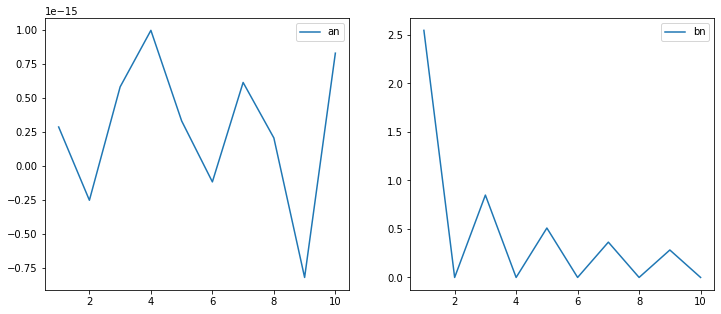

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(list(range(1, n_harmonic + 1)), fourier.get_coefs()[0], label="an")
ax1.legend()

ax2.plot(list(range(1, n_harmonic + 1)), fourier.get_coefs()[1], label="bn")
ax2.legend()

plt.show()

Выводим результат вычисления рядов Фурье для прямоугольного сигнала и ошибку приближения

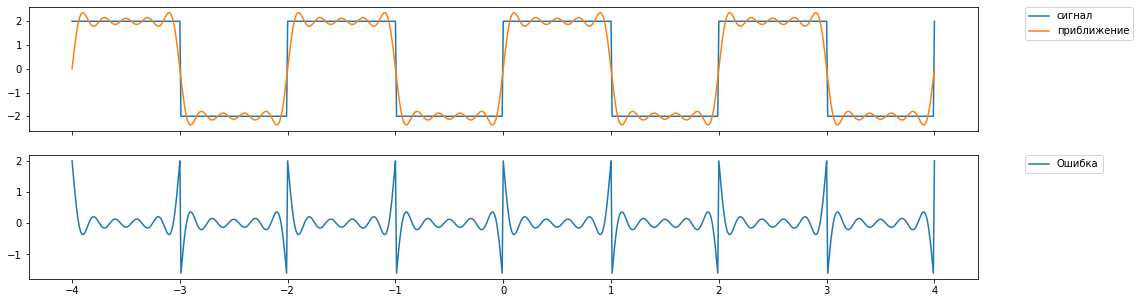

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(17, 5), sharex=True)

ax1.plot(x, y, label="сигнал")
ax1.plot(x, y_fourier, label="приближение")
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

error = [y[i] - y_fourier[i] for i in range(len(y))]
ax2.plot(x, error, label="Ошибка")
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

# Task 2

Функция косинуса с частотой f и амплитудой A

In [ ]:
def f_2(x, args=[]):
    f = args[0]
    A = 1
    if len(args) == 2:
        A = args[1]
    return A * np.cos(x * 2 * np.pi * f)

Задаем функцию косинуса с частотой 100Гц и аплитудой 2

In [ ]:
f_f = 100
fmax = f_f * 10
T = 1 / fmax
N = 2000
A = 2

x = np.linspace(0, N * T, num=N, endpoint=True)
y = [f_2(t, [f_f, A]) for t in x]

Выводим полученную функцию

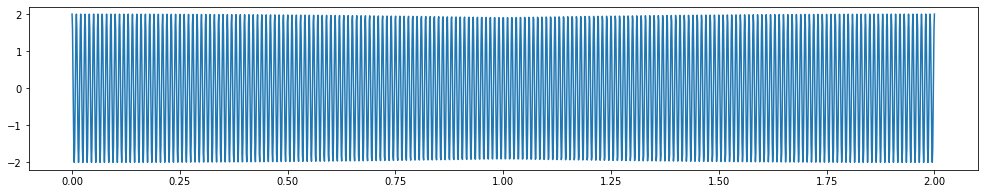

In [ ]:
plt.figure(figsize=(17, 3))
plt.plot(x, y)
plt.show()

Вычисляем ряды Фурье для функции косинуса

In [ ]:
fourier = Fourier(f_2, 1/f_f, [f_f, A])

n_harmonic = 4
y_fourier = fourier.compute(x, n_harmonic)

Выводим результат вычисления рядов Фурье для функции косинуса и ошибку приближения

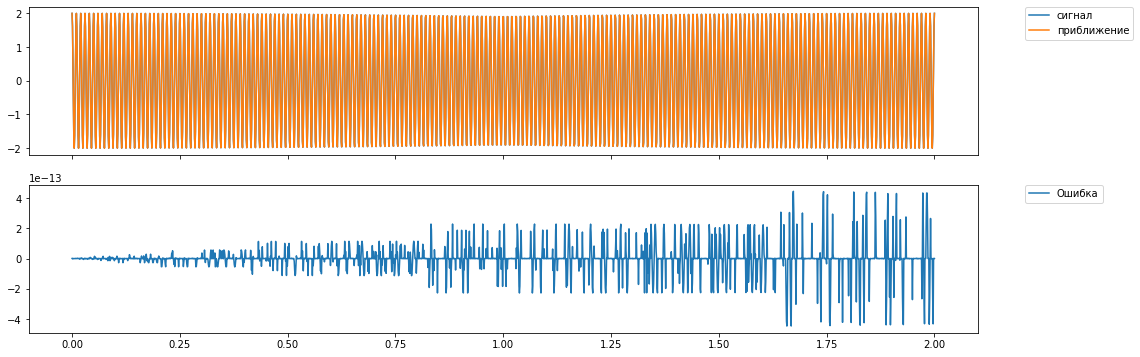

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(17, 6), sharex=True)

ax1.plot(x, y, label="сигнал")
ax1.plot(x, y_fourier, label="приближение")
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

error = [y[i] - y_fourier[i] for i in range(len(y))]
ax2.plot(x, error, label="Ошибка")
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Ищем спектр функции через преобразование Фурье и ряды Фурье и выводим результат для сравнения

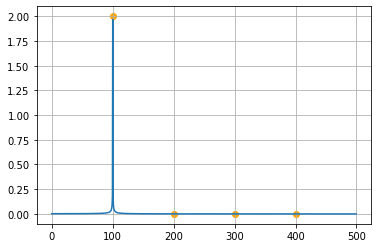

In [ ]:
yf = fft.fft(y)[0:N//2]
yf = 2.0/N * np.abs(yf)
xf = fft.fftfreq(N, T)[:N//2]

x_a_n = np.arange(1, n_harmonic + 1) * f_f
a_n = fourier.get_coefs()[0]

plt.plot(xf, yf)
plt.scatter(x_a_n, a_n, c="orange")


plt.grid()
plt.show()

# Task 3

Задаем прямоугольный сигнал с частотой 0.5Гц и амплитудой 2

In [ ]:
f_f = 0.5
fmax = 20
T = 1 / fmax
A = 2
N = 1000
x = np.linspace(0, N*T, num=N, endpoint=True)
y = [f_1(t, [f_f, A]) for t in x]

Вычисляем ряды Фурье для прямоугольного сигнала

In [ ]:
fourier = Fourier(f_1, 1/f_f, [f_f, A])

n_harmonic = 20
y_fourier = fourier.compute(x, n_harmonic)

Выводим результат вычисления рядов Фурье для прямоугольного сигнала и ошибку приближения

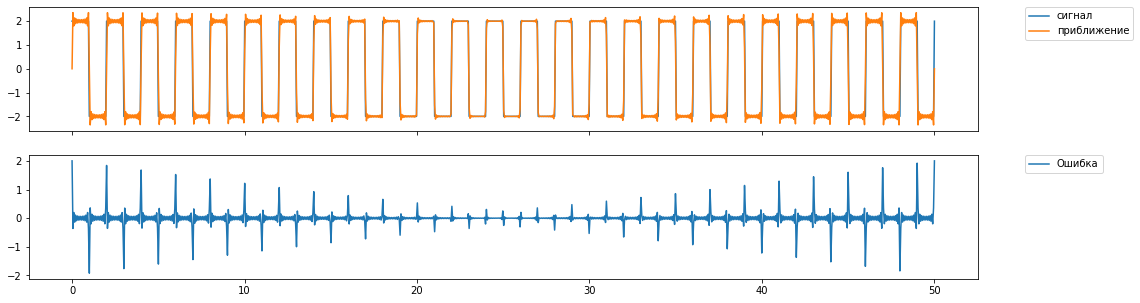

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(17, 5), sharex=True)

ax1.plot(x, y, label="сигнал")
ax1.plot(x, y_fourier, label="приближение")
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

error = [y[i] - y_fourier[i] for i in range(len(y))]
ax2.plot(x, error, label="Ошибка")
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Ищем спектр прямоугольного сигнала через преобразование Фурье и ряды Фурье и выводим результат для сравнения

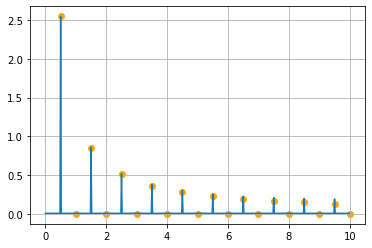

In [ ]:
yf = fft.fft(y)[0:N//2]
yf = 2.0/N * np.abs(yf)
xf = fft.fftfreq(N, T)[:N//2]

x_b_n = np.arange(1, n_harmonic + 1) * f_f
b_n = fourier.get_coefs()[1]

plt.plot(xf, yf)
plt.scatter(x_b_n, b_n, c="orange")


plt.grid()
plt.show()

# Task 4

Функция зашумленного прямоугольного сигнала

In [ ]:
def f_1_noise(x, args=[]):
    T = 1 / args[0]
    A = 1
    if len(args) == 2:
        A = args[1]

    noise = float(np.random.normal(0, 1, 1))
    
    if x % T <= 1:
        return A + noise
    else:
        return -A + noise

Задаем зашумленный прямоугольный сигнал с частотой 0.5Гц и амплитудой 2

In [ ]:
f_f = 0.5
fmax = 20
T = 1 / fmax
A = 2
N = 1000
x = np.linspace(0, N*T, num=N, endpoint=True)
y = [f_1_noise(t, [f_f, A]) for t in x]

Выводим получившийся зашумленный сигнал

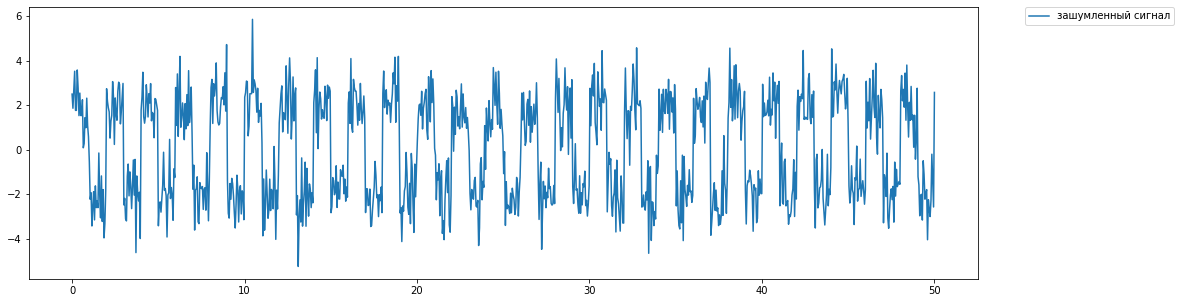

In [ ]:
plt.figure(figsize=(17, 5))

plt.plot(x, y, label="зашумленный сигнал")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Пытаемся аппроксимировать зашумленный сигнал через ряды Фурье

In [ ]:
fourier = Fourier(f_1_noise, 1/f_f, [f_f, A])

n_harmonic = 20
y_fourier = fourier.compute(x, n_harmonic)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a

Выводим получившееся приближение и сравниваем с исходным сигналом

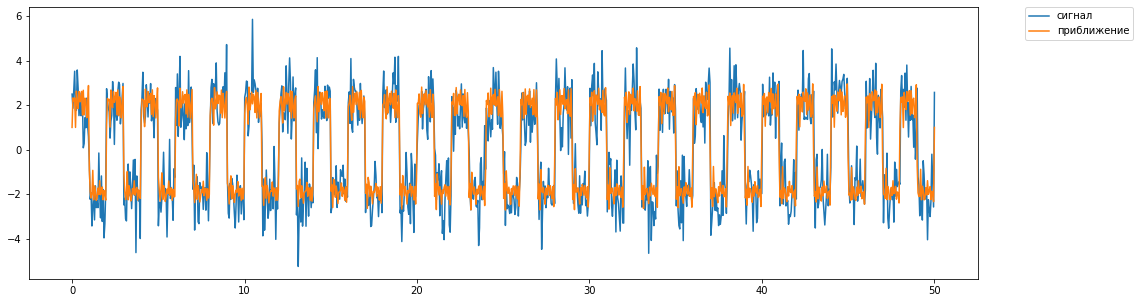

In [ ]:
plt.figure(figsize=(17, 5))

plt.plot(x, y, label="сигнал")
plt.plot(x, y_fourier, label="приближение")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Ищем спектр зашумленного прямоугольного сигнала через преобразование Фурье и ряды Фурье и выводим результат для сравнения

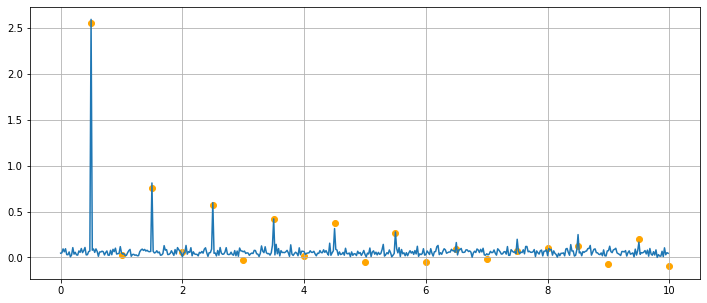

In [ ]:
yf = fft.fft(y)[0:N//2]
yf = 2.0/N * np.abs(yf)
xf = fft.fftfreq(N, T)[:N//2]

x_b_n = np.arange(1, n_harmonic + 1) * f_f
b_n = fourier.get_coefs()[1]

plt.figure(figsize=(12, 5))
plt.plot(xf, yf)
plt.scatter(x_b_n, b_n, c="orange")

plt.grid()
plt.show()

На графике выше видно, как шум влияет на вычисление спектра прямоугольного сигнала. Помимо пиков частот мы наблюдаем небольшие колебания в местах, где амплитуда равна нулю.

Можно заметить, что оба алгоритма смогли приближенно найти амплитуды низких частот, но чем выше частота, тем хуже алгоритмы справлялись с поиском амплитуд в зашумленном сигнале.